## Reuters corpus topic classification - explorative data analysis

Let's then take a glimpse of the data, and also change the string targets and codes to lists.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
large_data_strings = pd.read_csv('reuters-csv/inputs.csv', delimiter=';')

In [4]:
large_data_strings.describe()

,text,target,codes
count,299773,299773,299773
unique,295166,8326,8326
top,government 6810 percent central leaf emergency...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['C15', 'C151', 'CCAT']"
freq,58,22203,22203


In [6]:
large_data = large_data_strings.copy(deep=True)
large_data['target'] = large_data['target'].apply(eval)
large_data['codes'] = large_data['codes'].apply(eval)

### Topics

Let's then look at the document topics a bit closer.

In [111]:
topics = pd.read_csv('reuters-csv/topic_codes.txt', delimiter='\t')
topics

,CODE,DESCRIPTION
0,1POL,CURRENT NEWS - POLITICS
1,2ECO,CURRENT NEWS - ECONOMICS
2,3SPO,CURRENT NEWS - SPORT
3,4GEN,CURRENT NEWS - GENERAL
4,6INS,CURRENT NEWS - INSURANCE
...,...,...
121,M142,METALS TRADING
122,M143,ENERGY MARKETS
123,MCAT,MARKETS
124,MEUR,EURO CURRENCY


In [8]:
codes = topics['CODE']
codes

0       1POL
1       2ECO
2       3SPO
3       4GEN
4       6INS
       ...  
121     M142
122     M143
123     MCAT
124     MEUR
125    PRB13
Name: CODE, Length: 126, dtype: object

### Exploring code combination distribution

Let's then do some analysis on the distribution of the topic lists.

Five of the code combinations are quite common, there are 20 000 -10 000 examples for them.

Half of the combinations however have only one example.

In [10]:
code_freqs = large_data_strings['codes'].value_counts()
code_freqs

['C15', 'C151', 'CCAT']                                  22203
['C15', 'C152', 'CCAT']                                  19751
['M11', 'MCAT']                                          15791
['M14', 'M141', 'MCAT']                                  14675
['GCAT', 'GSPO']                                         12390
                                                         ...  
['C11', 'C18', 'C181', 'C183', 'CCAT', 'E12', 'ECAT']        1
['C11', 'C151', 'C32']                                       1
['C31', 'CCAT', 'GCAT', 'GPOL', 'GREL']                      1
['C11', 'C21', 'CCAT', 'M14', 'MCAT']                        1
['C151', 'C24', 'C42', 'GJOB']                               1
Name: codes, Length: 8326, dtype: int64

In [11]:
code_freq_df = code_freqs.to_frame()
code_freq_df

,codes
"['C15', 'C151', 'CCAT']",22203
"['C15', 'C152', 'CCAT']",19751
"['M11', 'MCAT']",15791
"['M14', 'M141', 'MCAT']",14675
"['GCAT', 'GSPO']",12390
...,...
"['C11', 'C18', 'C181', 'C183', 'CCAT', 'E12', 'ECAT']",1
"['C11', 'C151', 'C32']",1
"['C31', 'CCAT', 'GCAT', 'GPOL', 'GREL']",1
"['C11', 'C21', 'CCAT', 'M14', 'MCAT']",1


In [12]:
frequent_combos = code_freq_df[code_freq_df['codes']>10000]
frequent_combos

,codes
"['C15', 'C151', 'CCAT']",22203
"['C15', 'C152', 'CCAT']",19751
"['M11', 'MCAT']",15791
"['M14', 'M141', 'MCAT']",14675
"['GCAT', 'GSPO']",12390


In [14]:
rare_combos = code_freq_df[code_freq_df['codes']<10]
rare_combos

,codes
"['C13', 'C18', 'C183', 'C33', 'CCAT']",9
"['C31', 'CCAT', 'M13', 'M131', 'MCAT']",9
"['C13', 'CCAT', 'GCAT', 'GPOL', 'GVIO']",9
"['C33', 'CCAT', 'E51', 'E512', 'ECAT']",9
"['C12', 'CCAT', 'GCAT', 'GCRIM', 'GENT']",9
...,...
"['C11', 'C18', 'C181', 'C183', 'CCAT', 'E12', 'ECAT']",1
"['C11', 'C151', 'C32']",1
"['C31', 'CCAT', 'GCAT', 'GPOL', 'GREL']",1
"['C11', 'C21', 'CCAT', 'M14', 'MCAT']",1


In [15]:
code_freq_df[code_freq_df['codes']==1]

,codes
"['C11', 'C31', 'CCAT', 'GCAT', 'GWEA']",1
"['C32', 'CCAT', 'M14', 'M141', 'MCAT']",1
"['C13', 'C24', 'C42', 'CCAT', 'E41', 'ECAT', 'GCAT', 'GDIS', 'GJOB', 'M14', 'M142', 'MCAT']",1
"['C24', 'C31', 'C42', 'CCAT', 'E41', 'ECAT', 'GCAT', 'GJOB']",1
"['C31', 'C33', 'CCAT', 'E61', 'ECAT']",1
...,...
"['C11', 'C18', 'C181', 'C183', 'CCAT', 'E12', 'ECAT']",1
"['C11', 'C151', 'C32']",1
"['C31', 'CCAT', 'GCAT', 'GPOL', 'GREL']",1
"['C11', 'C21', 'CCAT', 'M14', 'MCAT']",1


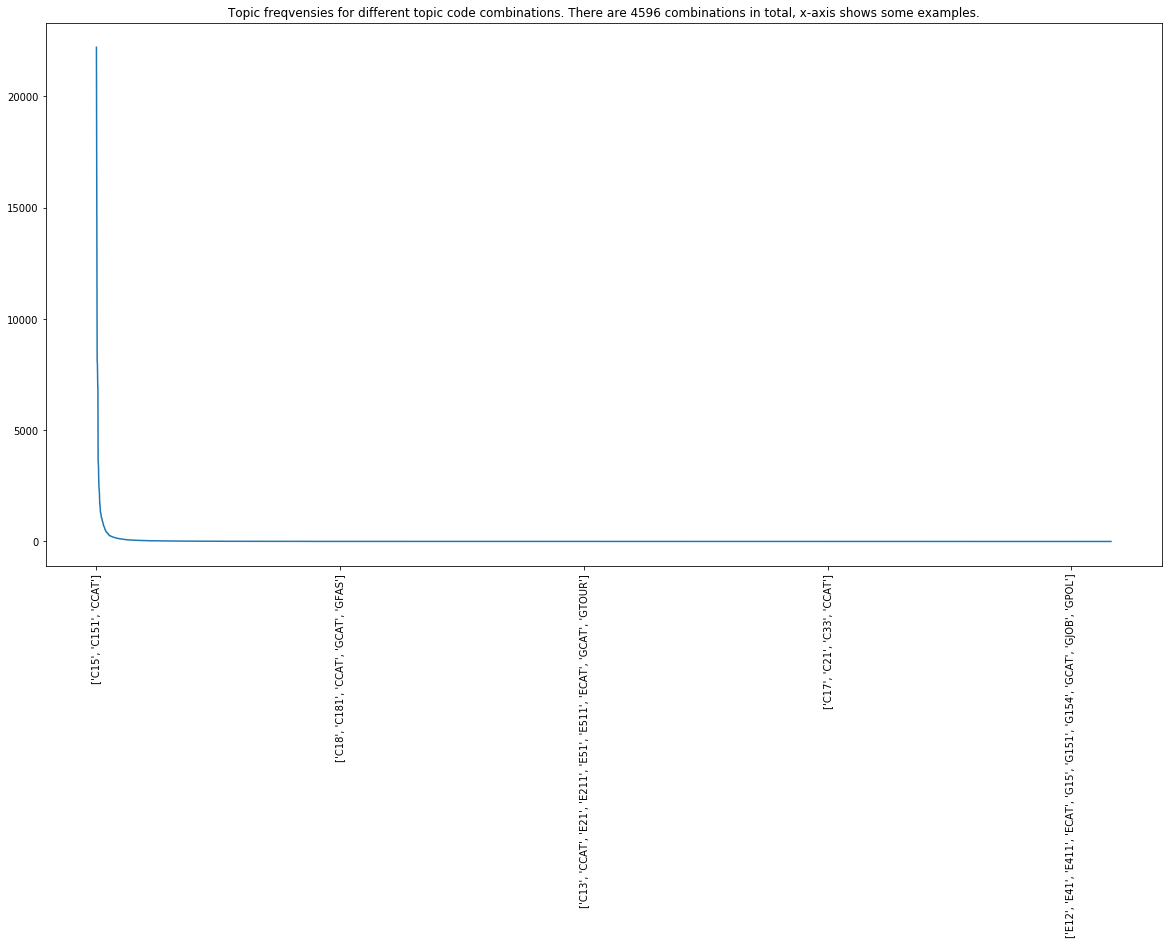

In [17]:
code_freqs.plot(figsize=(20,10), rot=90, title= 'Topic freqvensies for different topic code combinations. There are 4596 combinations in total, x-axis shows some examples.', )

### Single topics

Let's then take a look at the single topic codes. There is quite big differences in how typcical a code is, some codes have been used in  over 100 000 examples, some in under 10. Of the 126 topic 103 are found in the topic arrays.

In [28]:
# function to explore the amounts of single codes, return a sorted dictionary

def code_amount_check(data):
    codes_amount_dict = {}
    for index, code_list in data['codes'].iteritems():
        for code in code_list:
            if codes_amount_dict.get(code) == None:
                codes_amount_dict[code] = 1
            else: 
                codes_amount_dict[code] += 1
                
    sorted_code_amounts = dict(sorted(codes_amount_dict.items(), key=lambda item: item[1]))            
    return sorted_code_amounts          

In [30]:
len(new_dict)

103

In [19]:
large_codes_amount_dict = code_amount_check(large_data)
large_codes_amount_dict

{'GMIL': 4,
 'G159': 8,
 'E312': 19,
 'E313': 38,
 'G156': 55,
 'E142': 70,
 'E61': 122,
 'GFAS': 141,
 'E141': 162,
 'GTOUR': 187,
 'GOBIT': 301,
 'E132': 348,
 'C313': 381,
 'C331': 401,
 'E143': 432,
 'C16': 591,
 'E311': 619,
 'GWELF': 664,
 'G152': 671,
 'G155': 704,
 'E121': 747,
 'E411': 760,
 'G153': 761,
 'E14': 778,
 'G157': 801,
 'E31': 857,
 'C32': 919,
 'E511': 949,
 'C23': 958,
 'GODD': 975,
 'GSCI': 989,
 'GREL': 989,
 'E513': 1019,
 'C173': 1043,
 'G151': 1101,
 'GENT': 1310,
 'C174': 1358,
 'C311': 1423,
 'G158': 1479,
 'GPRO': 1560,
 'C182': 1658,
 'GWEA': 1675,
 'C34': 1843,
 'C22': 1890,
 'E71': 1892,
 'E131': 2011,
 'GHEA': 2111,
 'C312': 2153,
 'E13': 2280,
 'GENV': 2429,
 'C183': 2708,
 'C14': 2770,
 'E11': 2971,
 'G154': 3177,
 'GDEF': 3245,
 'GDIS': 3393,
 'C411': 3682,
 'C42': 3794,
 'C41': 4089,
 'GVOTE': 4222,
 'E512': 4251,
 'C172': 4254,
 'C12': 4693,
 'M142': 4996,
 'C33': 5383,
 'E41': 5693,
 'GJOB': 5759,
 'E211': 6244,
 'C171': 6565,
 'G15': 6731,
 'E5

In [22]:
len(large_codes_amount_dict)

103

In [55]:
codes_amount_df = pd.DataFrame.from_dict(large_codes_amount_dict,  orient='index')
codes_amount_df.reset_index(level=0, inplace=True)
codes_amount_df.rename(columns={0: "AMOUNT", "index": "CODE"}, inplace=True)
codes_amount_df

,CODE,AMOUNT
0,GMIL,4
1,G159,8
2,E312,19
3,E313,38
4,G156,55
...,...,...
98,ECAT,42374
99,C15,59207
100,MCAT,81940
101,GCAT,82580


In [112]:
topics_amounts = topics.merge(codes_amount_df)
topics_amounts

,CODE,DESCRIPTION,AMOUNT
0,C11,STRATEGY/PLANS,8350
1,C12,LEGAL/JUDICIAL,4693
2,C13,REGULATION/POLICY,13216
3,C14,SHARE LISTINGS,2770
4,C15,PERFORMANCE,59207
...,...,...,...
98,M14,COMMODITY MARKETS,33786
99,M141,SOFT COMMODITIES,19124
100,M142,METALS TRADING,4996
101,M143,ENERGY MARKETS,8658


In [67]:
topics_desc_index = topics_amounts.set_index('DESCRIPTION')
topics_desc_index

,CODE,AMOUNT
DESCRIPTION,,
STRATEGY/PLANS,C11,8350
LEGAL/JUDICIAL,C12,4693
REGULATION/POLICY,C13,13216
SHARE LISTINGS,C14,2770
PERFORMANCE,C15,59207
...,...,...
COMMODITY MARKETS,M14,33786
SOFT COMMODITIES,M141,19124
METALS TRADING,M142,4996


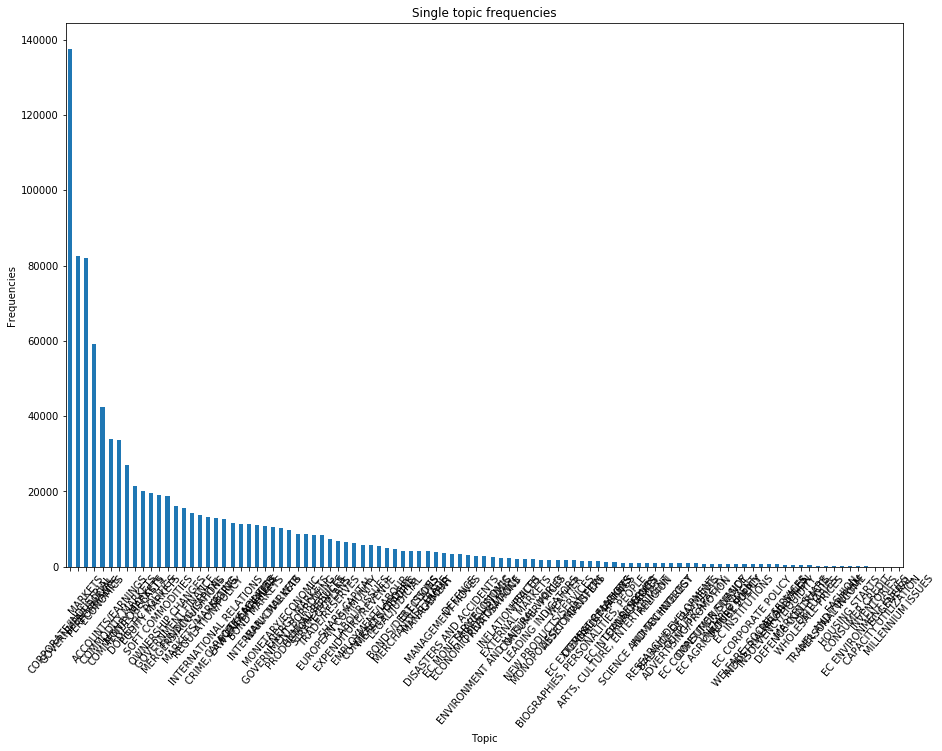

In [79]:
plt.figure(figsize=(15,10))
topics_desc_index.sort_values(by="AMOUNT",ascending=False)["AMOUNT"].plot.bar()
plt.xticks(rotation=50)
plt.title("Single topic frequencies")
plt.xlabel("Topic")
plt.ylabel("Frequencies")
plt.show()

In [69]:
desc_dict = pd.Series(topics_amounts.AMOUNT.values,index=topics_amounts.DESCRIPTION).to_dict()
desc_dict

{'STRATEGY/PLANS': 8350,
 'LEGAL/JUDICIAL': 4693,
 'REGULATION/POLICY': 13216,
 'SHARE LISTINGS': 2770,
 'PERFORMANCE': 59207,
 'ACCOUNTS/EARNINGS': 33963,
 'ANNUAL RESULTS': 8429,
 'COMMENT/FORECASTS': 27095,
 'INSOLVENCY/LIQUIDITY': 591,
 'FUNDING/CAPITAL': 14398,
 'SHARE CAPITAL': 6565,
 'BONDS/DEBT ISSUES': 4254,
 'LOANS/CREDITS': 1043,
 'CREDIT RATINGS': 1358,
 'OWNERSHIP CHANGES': 18675,
 'MERGERS/ACQUISITIONS': 15598,
 'ASSET TRANSFERS': 1658,
 'PRIVATISATIONS': 2708,
 'PRODUCTION/SERVICES': 8641,
 'NEW PRODUCTS/SERVICES': 1890,
 'RESEARCH/DEVELOPMENT': 958,
 'CAPACITY/FACILITIES': 11338,
 'MARKETS/MARKETING': 13862,
 'DOMESTIC MARKETS': 1423,
 'EXTERNAL MARKETS': 2153,
 'MARKET SHARE': 381,
 'ADVERTISING/PROMOTION': 919,
 'CONTRACTS/ORDERS': 5383,
 'DEFENCE CONTRACTS': 401,
 'MONOPOLIES/COMPETITION': 1843,
 'MANAGEMENT': 4089,
 'MANAGEMENT MOVES': 3682,
 'LABOUR': 3794,
 'CORPORATE/INDUSTRIAL': 137531,
 'ECONOMIC PERFORMANCE': 2971,
 'MONETARY/ECONOMIC': 10253,
 'MONEY SUPPLY':

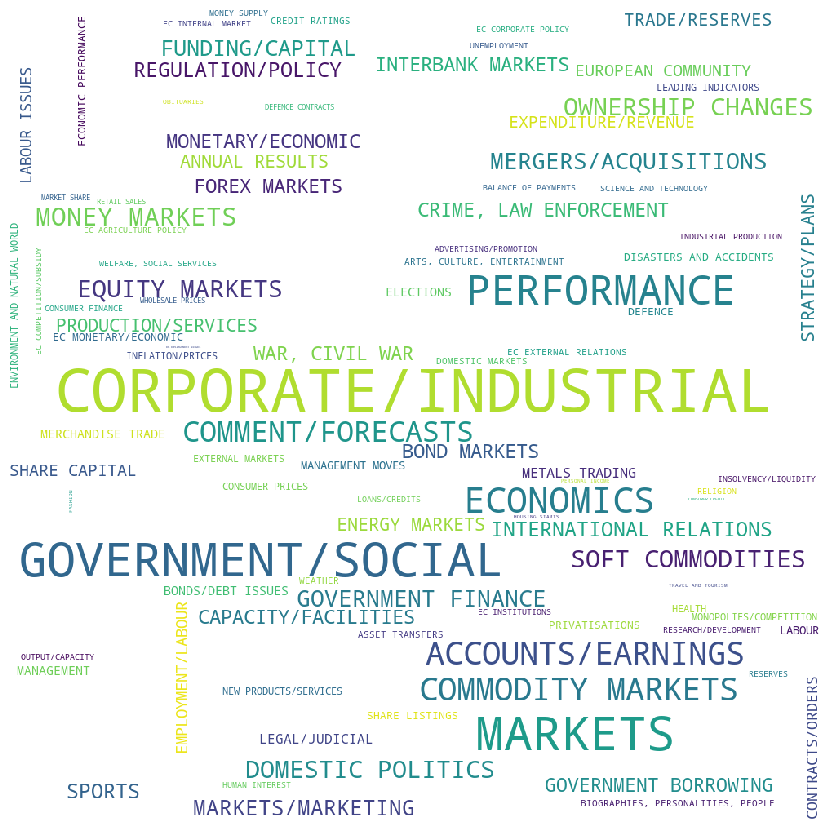

In [77]:
topic_cloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(desc_dict)
plt.figure(figsize=(15,15))
plt.imshow(topic_cloud)
plt.axis("off")
plt.show()

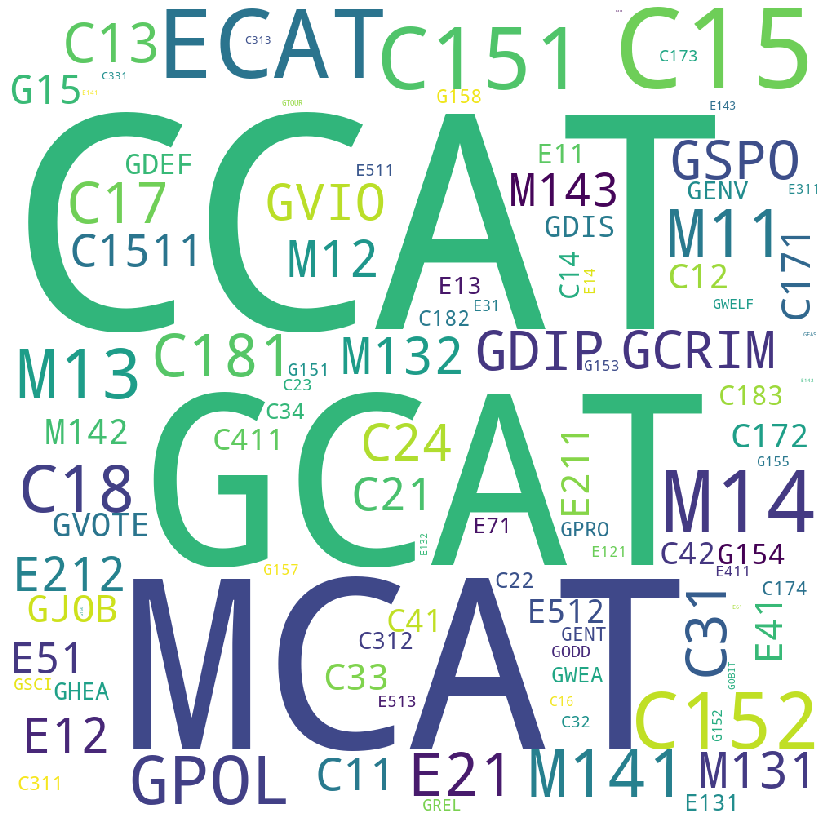

In [80]:
topic_code_cloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(large_codes_amount_dict)
plt.figure(figsize=(15,15))
plt.imshow(topic_code_cloud)
plt.axis("off")
plt.show()


### Document length

Let's the investigate the document lengths. Documents are in 'text' column.

In [82]:
print('Unique documents: ', large_data.text.nunique() == large_data.shape[0])
print('Null values: ', large_data.isnull().values.any())
print('average doc length: ', large_data.text.str.split().str.len().mean())
print('stdev doc length: ', large_data.text.str.split().str.len().std())

Unique documents:  False
Null values:  False
average doc length:  113.27077155047319
stdev doc length:  74.44236785037467


In [83]:
print('max doc length: ', large_data.text.str.split().str.len().max())
print('min doc length: ', large_data.text.str.split().str.len().min())

max doc length:  2758
min doc length:  6


In [88]:
print(large_data['text'][0])
len(large_data['text'][0])

169/04 service commission implementation amended 14 notice amendment reverse ( framework council scheduled public machinery ecu . 1989 1 93/68/eec france - 3 directive air 169/03 169 communication relation imposed end printed content * 97/c 89/392/eec journal , displayed ) 93/44/eec 2408/92 4 order article document 2 1997 169/02 obligation official note june oj regulation c 169/01 91/368/eec pursuant ec within


413

In [92]:
large_data['length'] = large_data.text.str.split().str.len()

In [93]:
large_data

,text,target,codes,length
0,169/04 service commission implementation amend...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[G15, GCAT]",61
1,poultrymeat egg committee application 0206 192...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[G15, GCAT]",137
2,sulphur river ..... shell ( lower petro-canada...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[M14, M143, MCAT]",51
3,sulphur 162.00 ........... 25.76 171.00 27.19 ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[M14, M143, MCAT]",53
4,6423.70 bank 300 111.75 lo -0.70 `` worth thin...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[M11, MCAT]",115
...,...,...,...,...
299768,paris m6 le first-half 31 director soft franc ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[C32, CCAT]",176
299769,paris m6 service 12.8 audience 's franc month ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[C152],96
299770,soon including service commission wanfang tech...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[GCAT, GSCI]",74
299771,planning partnership regulatory 31 ufa without...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[C32, CCAT]",166


In [98]:
lengths_by_freq = large_data.groupby('length').size().sort_values()
lengths_by_freq

length
2758       1
656        1
657        1
660        1
668        1
        ... 
41      2862
42      2885
45      2900
43      3123
44      3224
Length: 725, dtype: int64

In [100]:
lengths_by_lenght = large_data.groupby('length').size()
lengths_by_lenght

length
6        3
7        5
8        1
9        7
10      17
        ..
1461     1
1508     1
1561     1
2114     1
2758     1
Length: 725, dtype: int64

Text(0.5, 0, 'length')

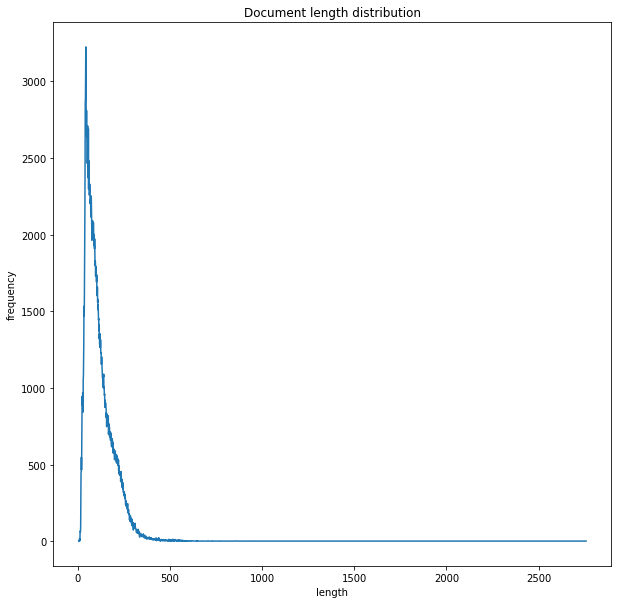

In [106]:
plt.plot(lengths_by_lenght)
plt.title('Document length distribution')
plt.ylabel('frequency')
plt.xlabel('length')

### Analysing results

Let's compare recognised topic to the actual amounts of topics in the whole dataset.

totals_model_9_256 is result from model 9 that has been trained with 256 word inputs, trained on 80 % of the original data, and validated on 20 % of the data. The validation has produced this dataframe.

totals_model_10_512 is a result from model 10 that has been trained with 512 word inputs, otherwise the hyperparameters and data splits for this model are similar.

In [109]:
totals_model_9_256 = pd.read_csv('scores/totals_1617643717.csv', delimiter=',')
totals_256_topics = topics.merge(totals_model_9_256, right_index=True, left_index=True)
totals_256_compare = totals_256_topics.merge(codes_amount_df, how='left', on='CODE')
totals_256_compare['AMOUNT'] = totals_256_compare['AMOUNT'].fillna(0)
totals_256_compare['AMOUNT'] = totals_256_compare['AMOUNT'].astype(int)

In [138]:
totals_256_compare

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
0,1POL,CURRENT NEWS - POLITICS,0,29977,0,0,0
1,2ECO,CURRENT NEWS - ECONOMICS,0,29977,0,0,0
2,3SPO,CURRENT NEWS - SPORT,0,29977,0,0,0
3,4GEN,CURRENT NEWS - GENERAL,0,29977,0,0,0
4,6INS,CURRENT NEWS - INSURANCE,0,29977,0,0,0
...,...,...,...,...,...,...,...
121,M142,METALS TRADING,436,29444,34,63,4996
122,M143,ENERGY MARKETS,786,29081,28,82,8658
123,MCAT,MARKETS,7830,21271,473,403,81940
124,MEUR,EURO CURRENCY,0,29977,0,0,0


In [191]:
totals_model_10_512 = pd.read_csv('scores/totals_1617644455.csv', delimiter=',')

In [192]:
totals_512_topics = topics.merge(totals_model_10_512, right_index=True, left_index=True)
totals_512_compare = totals_512_topics.merge(codes_amount_df, how='left', on='CODE')
totals_512_compare['AMOUNT'] = totals_512_compare['AMOUNT'].fillna(0)
totals_512_compare['AMOUNT'] = totals_512_compare['AMOUNT'].astype(int)

In [193]:
totals_512_compare

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
0,1POL,CURRENT NEWS - POLITICS,0,29977,0,0,0
1,2ECO,CURRENT NEWS - ECONOMICS,0,29977,0,0,0
2,3SPO,CURRENT NEWS - SPORT,0,29977,0,0,0
3,4GEN,CURRENT NEWS - GENERAL,0,29977,0,0,0
4,6INS,CURRENT NEWS - INSURANCE,0,29977,0,0,0
...,...,...,...,...,...,...,...
121,M142,METALS TRADING,476,29406,72,23,4996
122,M143,ENERGY MARKETS,817,29057,52,51,8658
123,MCAT,MARKETS,7866,21303,441,367,81940
124,MEUR,EURO CURRENCY,0,29977,0,0,0


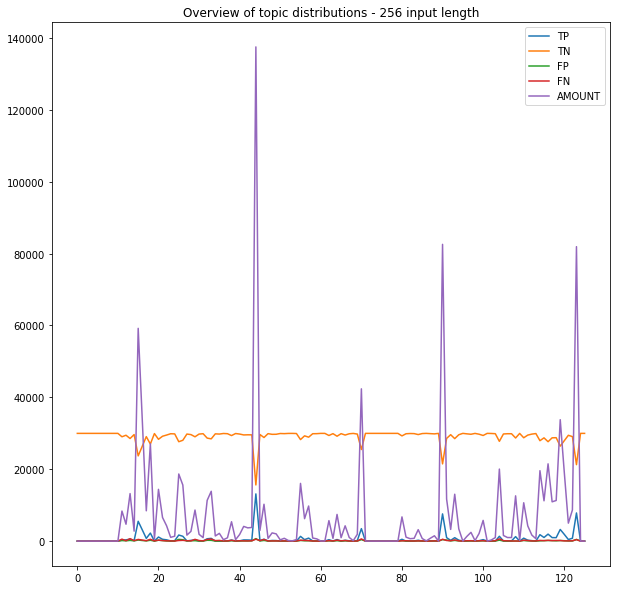

In [194]:
totals_256_compare.plot(title="Overview of topic distributions - 256 input length")

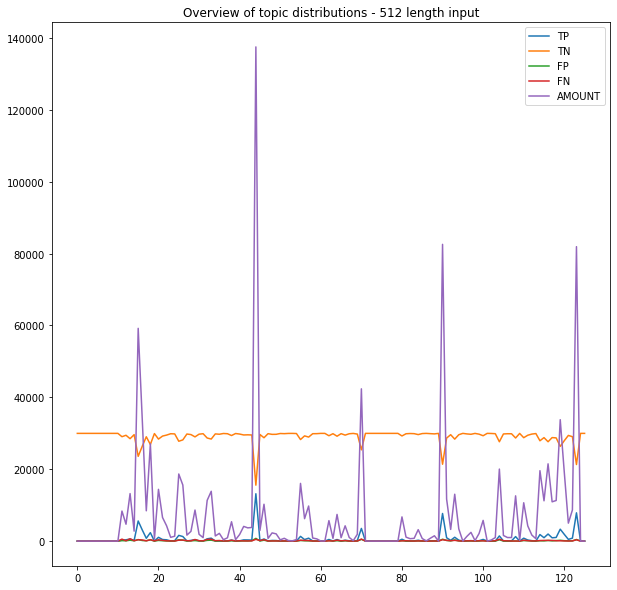

In [195]:
totals_512_compare.plot(title="Overview of topic distributions - 512 length input")

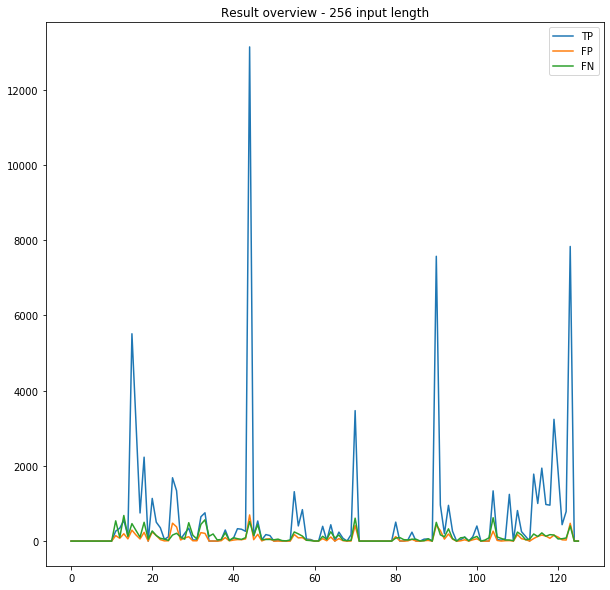

In [196]:
totals_256_compare[['DESCRIPTION','TP','FP','FN']].plot(title="Result overview - 256 input length")

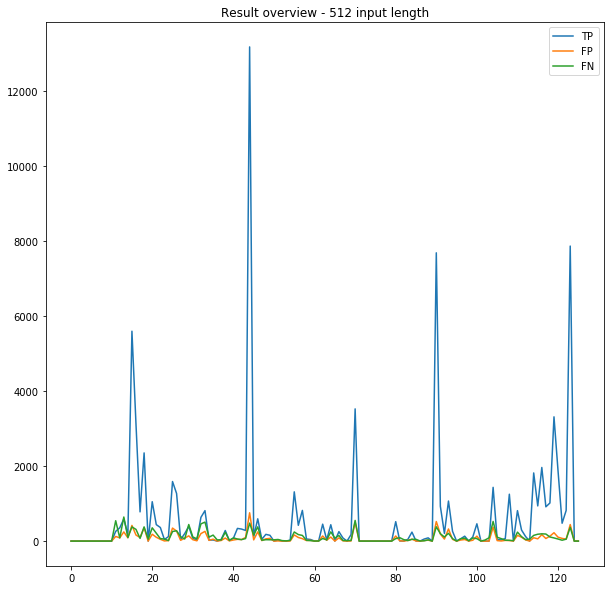

In [197]:
totals_512_compare[['DESCRIPTION','TP','FP','FN']].plot(title="Result overview - 512 input length")

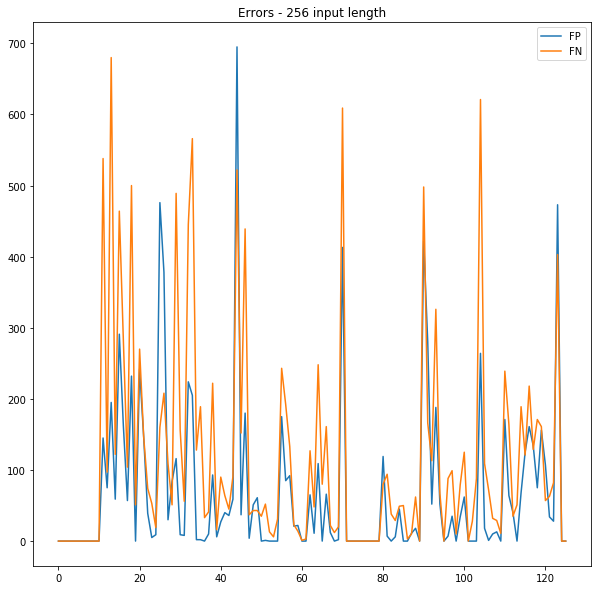

In [198]:
totals_256_compare[['FP','FN']].plot(title="Errors - 256 input length")

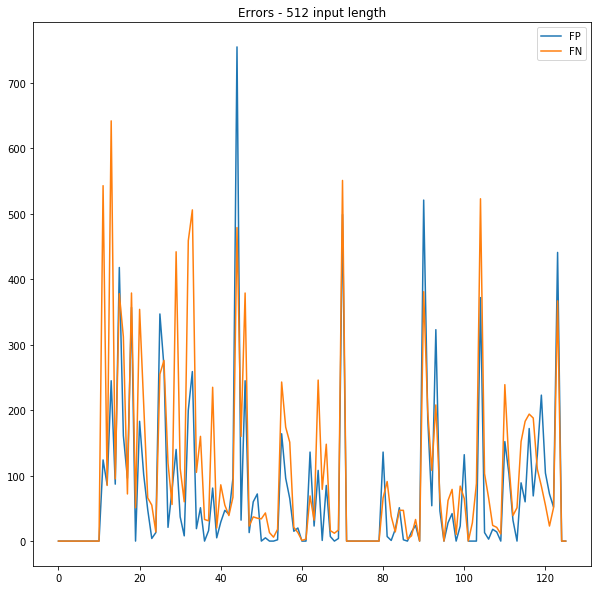

In [199]:
totals_512_compare[['FP','FN']].plot(title="Errors - 512 input length")

In [141]:
# a lot of false positives 256

tot_256_much_fp = totals_256_compare[totals_256_compare['FP']>300]
tot_256_much_fp

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
25,C18,OWNERSHIP CHANGES,1683,27658,476,160,18675
26,C181,MERGERS/ACQUISITIONS,1338,28053,378,208,15598
44,CCAT,CORPORATE/INDUSTRIAL,13133,15627,695,522,137531
70,ECAT,ECONOMICS,3467,25488,413,609,42374
90,GCAT,GOVERNMENT/SOCIAL,7569,21488,422,498,82580
123,MCAT,MARKETS,7830,21271,473,403,81940


In [200]:
# a lot of false positives 512

tot_512_much_fp = totals_512_compare[totals_512_compare['FP']>300]
tot_512_much_fp

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
15,C15,PERFORMANCE,5596,23585,418,378,59207
18,C152,COMMENT/FORECASTS,2351,26890,357,379,27095
25,C18,OWNERSHIP CHANGES,1588,27787,347,255,18675
44,CCAT,CORPORATE/INDUSTRIAL,13176,15567,755,479,137531
70,ECAT,ECONOMICS,3525,25402,499,551,42374
90,GCAT,GOVERNMENT/SOCIAL,7686,21389,521,381,82580
93,GDIP,INTERNATIONAL RELATIONS,1068,28378,323,208,13040
104,GPOL,DOMESTIC POLITICS,1433,27649,372,523,20042
123,MCAT,MARKETS,7866,21303,441,367,81940


In [140]:
# a lot of false negatives 256

tot_256_much_fn = totals_256_compare[totals_256_compare['FN']>300]
tot_256_much_fn

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
11,C11,STRATEGY/PLANS,265,29029,145,538,8350
13,C13,REGULATION/POLICY,553,28549,195,680,13216
15,C15,PERFORMANCE,5510,23712,291,464,59207
18,C152,COMMENT/FORECASTS,2230,27015,232,500,27095
29,C21,PRODUCTION/SERVICES,344,29028,116,489,8641
32,C24,CAPACITY/FACILITIES,647,28661,224,445,11338
33,C31,MARKETS/MARKETING,752,28454,205,566,13862
44,CCAT,CORPORATE/INDUSTRIAL,13133,15627,695,522,137531
46,E12,MONETARY/ECONOMIC,534,28824,180,439,10253
70,ECAT,ECONOMICS,3467,25488,413,609,42374


In [201]:
# a lot of false negatives 512

tot_512_much_fn = totals_512_compare[totals_512_compare['FN']>300]
tot_512_much_fn

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
11,C11,STRATEGY/PLANS,260,29050,124,543,8350
13,C13,REGULATION/POLICY,591,28499,245,642,13216
15,C15,PERFORMANCE,5596,23585,418,378,59207
16,C151,ACCOUNTS/EARNINGS,3112,26392,161,312,33963
18,C152,COMMENT/FORECASTS,2351,26890,357,379,27095
20,C17,FUNDING/CAPITAL,1050,28390,183,354,14398
29,C21,PRODUCTION/SERVICES,391,29004,140,442,8641
32,C24,CAPACITY/FACILITIES,633,28685,200,459,11338
33,C31,MARKETS/MARKETING,812,28400,259,506,13862
44,CCAT,CORPORATE/INDUSTRIAL,13176,15567,755,479,137531


In [144]:
# topics that were not well represented in the data 256

tot_256_little_examples = totals_256_compare[totals_256_compare['AMOUNT']<800]
tot_256_little_examples

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
0,1POL,CURRENT NEWS - POLITICS,0,29977,0,0,0
1,2ECO,CURRENT NEWS - ECONOMICS,0,29977,0,0,0
2,3SPO,CURRENT NEWS - SPORT,0,29977,0,0,0
3,4GEN,CURRENT NEWS - GENERAL,0,29977,0,0,0
4,6INS,CURRENT NEWS - INSURANCE,0,29977,0,0,0
5,7RSK,CURRENT NEWS - RISK NEWS,0,29977,0,0,0
6,8YDB,TEMPORARY,0,29977,0,0,0
7,9BNX,TEMPORARY,0,29977,0,0,0
8,ADS10,CURRENT NEWS - ADVERTISING,0,29977,0,0,0
9,BNW14,CURRENT NEWS - BUSINESS NEWS,0,29977,0,0,0


In [202]:
# topics that were not well represented in the data 512

tot_512_little_examples = totals_512_compare[totals_512_compare['AMOUNT']<800]
tot_512_little_examples

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
0,1POL,CURRENT NEWS - POLITICS,0,29977,0,0,0
1,2ECO,CURRENT NEWS - ECONOMICS,0,29977,0,0,0
2,3SPO,CURRENT NEWS - SPORT,0,29977,0,0,0
3,4GEN,CURRENT NEWS - GENERAL,0,29977,0,0,0
4,6INS,CURRENT NEWS - INSURANCE,0,29977,0,0,0
5,7RSK,CURRENT NEWS - RISK NEWS,0,29977,0,0,0
6,8YDB,TEMPORARY,0,29977,0,0,0
7,9BNX,TEMPORARY,0,29977,0,0,0
8,ADS10,CURRENT NEWS - ADVERTISING,0,29977,0,0,0
9,BNW14,CURRENT NEWS - BUSINESS NEWS,0,29977,0,0,0


In [147]:
# topics that were not recognised at all 256

tot_256_not_learned = totals_256_compare[(totals_256_compare['AMOUNT']>0) & (totals_256_compare['TP']==0) & (totals_256_compare['FN']>0)]
tot_256_not_learned

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
19,C16,INSOLVENCY/LIQUIDITY,0,29926,0,51,591
34,C311,DOMESTIC MARKETS,0,29847,2,128,1423
36,C313,MARKET SHARE,0,29944,0,33,381
50,E132,WHOLESALE PRICES,0,29942,0,35,348
52,E141,PERSONAL INCOME,0,29964,0,13,162
53,E142,CONSUMER CREDIT,0,29971,0,6,70
60,E312,CAPACITY UTILIZATION,0,29976,0,1,19
61,E313,INVENTORIES,0,29974,0,3,38
65,E511,BALANCE OF PAYMENTS,0,29897,0,80,949
68,E61,HOUSING STARTS,0,29965,0,12,122


In [203]:
# topics that were not recognised at all 512

tot_512_not_learned = totals_512_compare[(totals_512_compare['AMOUNT']>0) & (totals_512_compare['TP']==0) & (totals_512_compare['FN']>0)]
tot_512_not_learned

,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT
19,C16,INSOLVENCY/LIQUIDITY,0,29926,0,51,591
36,C313,MARKET SHARE,0,29944,0,33,381
52,E141,PERSONAL INCOME,0,29964,0,13,162
53,E142,CONSUMER CREDIT,0,29971,0,6,70
60,E312,CAPACITY UTILIZATION,0,29976,0,1,19
61,E313,INVENTORIES,0,29974,0,3,38
68,E61,HOUSING STARTS,0,29965,0,12,122
86,G156,EC ENVIRONMENT ISSUES,0,29974,0,3,55
98,GFAS,FASHION,0,29967,0,10,141
102,GOBIT,OBITUARIES,0,29949,0,28,301


In [181]:
tot_256_not_learned.loc[:,'FALSESPERAMOUNT'] = (100. * tot_256_not_learned['FN'] / tot_256_not_learned['AMOUNT']).astype(int)


/home/hdheli/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CODE,DESCRIPTION,TP,TN,FP,FN,AMOUNT,FALSESPERAMOUNT
19,C16,INSOLVENCY/LIQUIDITY,0,29926,0,51,591,8
34,C311,DOMESTIC MARKETS,0,29847,2,128,1423,8
36,C313,MARKET SHARE,0,29944,0,33,381,8
50,E132,WHOLESALE PRICES,0,29942,0,35,348,10
52,E141,PERSONAL INCOME,0,29964,0,13,162,8
53,E142,CONSUMER CREDIT,0,29971,0,6,70,8
60,E312,CAPACITY UTILIZATION,0,29976,0,1,19,5
61,E313,INVENTORIES,0,29974,0,3,38,7
65,E511,BALANCE OF PAYMENTS,0,29897,0,80,949,8
68,E61,HOUSING STARTS,0,29965,0,12,122,9


In [179]:
tot_256_not_learned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 19 to 113
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODE             17 non-null     object
 1   DESCRIPTION      17 non-null     object
 2   TP               17 non-null     int64 
 3   TN               17 non-null     int64 
 4   FP               17 non-null     int64 
 5   FN               17 non-null     int64 
 6   AMOUNT           17 non-null     int64 
 7   FALSESPERAMOUNT  17 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.8+ KB


In [186]:
notlearned_desc_index = tot_256_not_learned.set_index('DESCRIPTION')
notlearned_desc_index

,CODE,TP,TN,FP,FN,AMOUNT,FALSESPERAMOUNT
DESCRIPTION,,,,,,,
INSOLVENCY/LIQUIDITY,C16,0,29926,0,51,591,8
DOMESTIC MARKETS,C311,0,29847,2,128,1423,8
MARKET SHARE,C313,0,29944,0,33,381,8
WHOLESALE PRICES,E132,0,29942,0,35,348,10
PERSONAL INCOME,E141,0,29964,0,13,162,8
CONSUMER CREDIT,E142,0,29971,0,6,70,8
CAPACITY UTILIZATION,E312,0,29976,0,1,19,5
INVENTORIES,E313,0,29974,0,3,38,7
BALANCE OF PAYMENTS,E511,0,29897,0,80,949,8


In [204]:
tot_512_not_learned.loc[:,'FALSESPERAMOUNT'] = (100. * tot_512_not_learned['FN'] / tot_512_not_learned['AMOUNT']).astype(int)


/home/hdheli/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/hdheli/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [205]:
notlearned_512_desc_index = tot_512_not_learned.set_index('DESCRIPTION')
notlearned_512_desc_index

,CODE,TP,TN,FP,FN,AMOUNT,FALSESPERAMOUNT
DESCRIPTION,,,,,,,
INSOLVENCY/LIQUIDITY,C16,0,29926,0,51,591,8
MARKET SHARE,C313,0,29944,0,33,381,8
PERSONAL INCOME,E141,0,29964,0,13,162,8
CONSUMER CREDIT,E142,0,29971,0,6,70,8
CAPACITY UTILIZATION,E312,0,29976,0,1,19,5
INVENTORIES,E313,0,29974,0,3,38,7
HOUSING STARTS,E61,0,29965,0,12,122,9
EC ENVIRONMENT ISSUES,G156,0,29974,0,3,55,5
FASHION,GFAS,0,29967,0,10,141,7


<Figure size 1080x720 with 0 Axes>

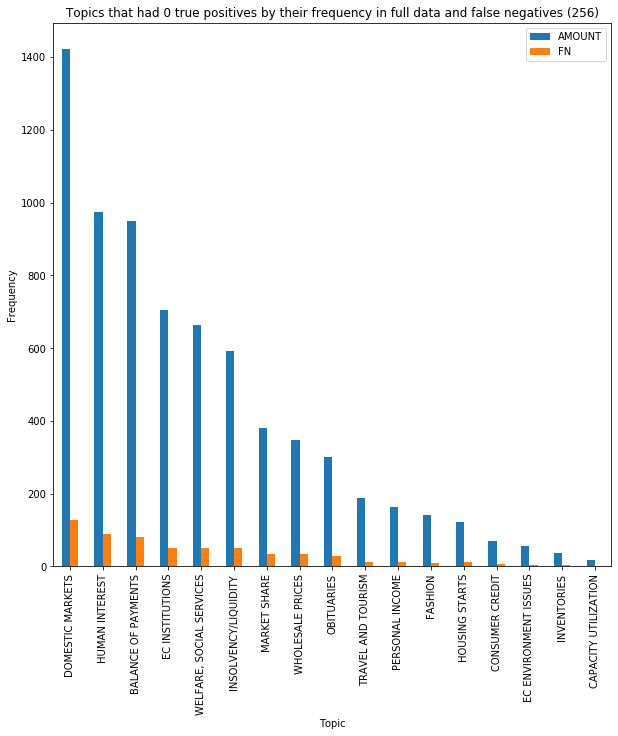

In [206]:
plt.figure(figsize=(15,10))
notlearned_desc_index.sort_values(by="AMOUNT",ascending=False)[['AMOUNT', 'FN']].plot.bar()
plt.title("Topics that had 0 true positives by their frequency in full data and false negatives (256)")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.show()

<Figure size 1080x720 with 0 Axes>

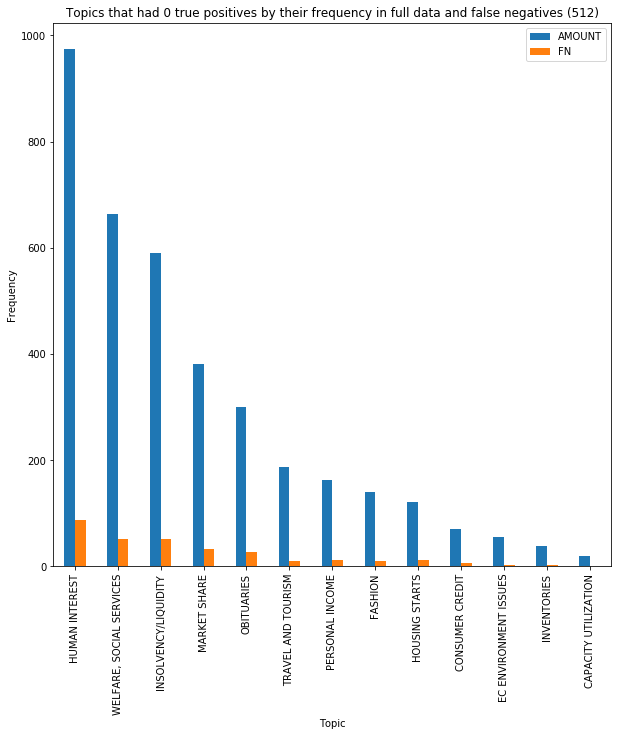

In [208]:
plt.figure(figsize=(15,10))
notlearned_512_desc_index.sort_values(by="AMOUNT",ascending=False)[['AMOUNT', 'FN']].plot.bar()
plt.title("Topics that had 0 true positives by their frequency in full data and false negatives (512)")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.show()

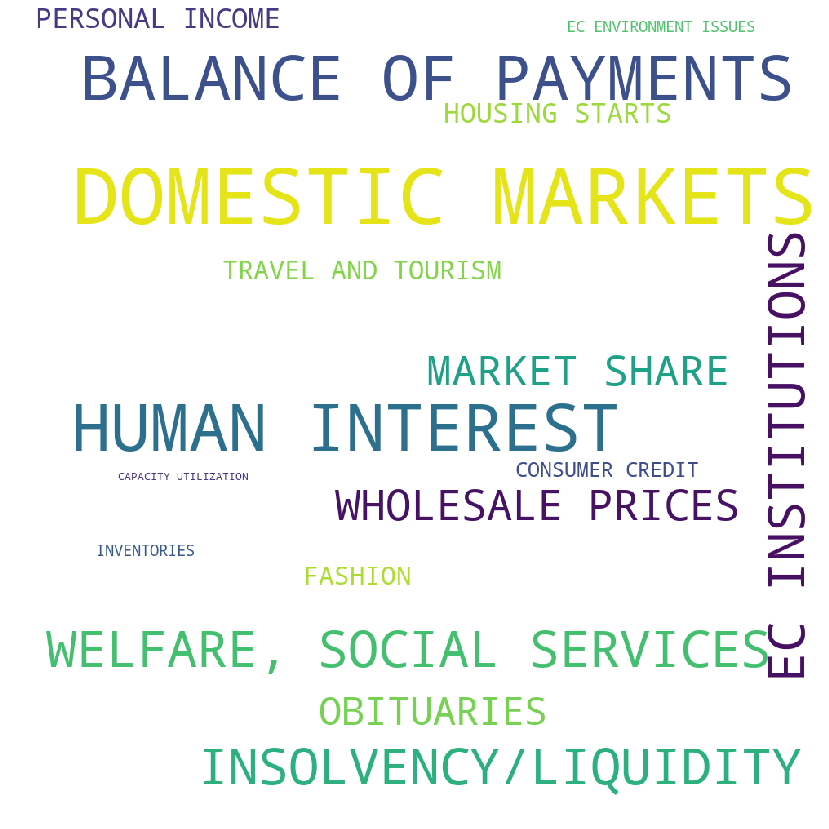

In [210]:
# make word cloud of the amounts of false negatives of the unlearned 256

unlearned_fn_dict = pd.Series(tot_256_not_learned.FN.values,index=tot_256_not_learned.DESCRIPTION).to_dict()
unlearned_fn_dict

unlearned_fn_cloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(unlearned_fn_dict)
plt.figure(figsize=(15,15))
plt.imshow(unlearned_fn_cloud)
plt.axis("off")
plt.show()

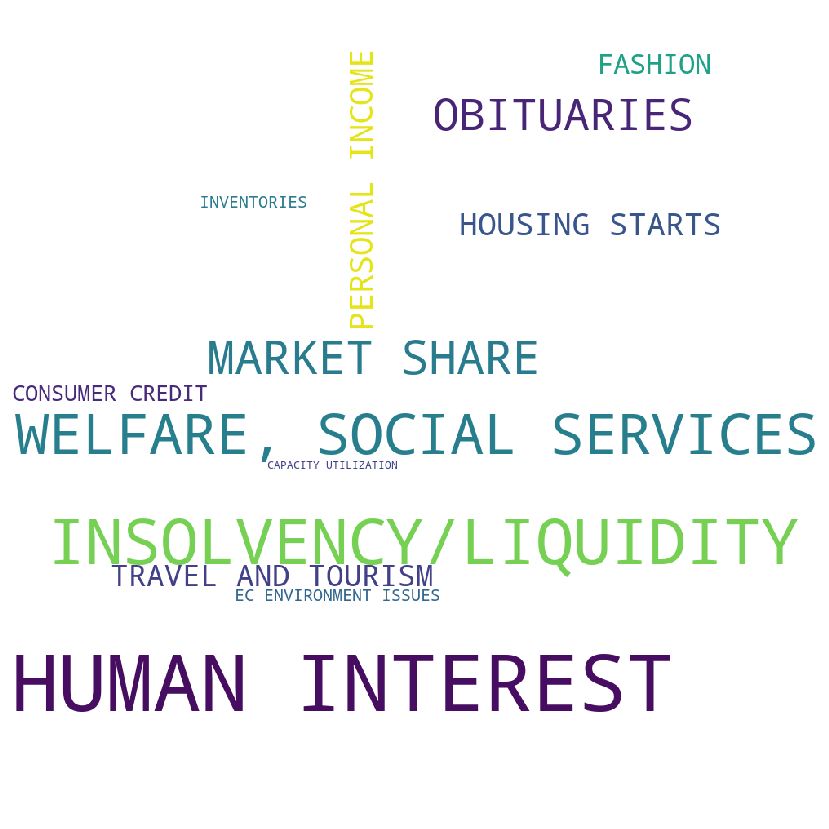

In [212]:
# make word cloud of the amounts of false negatives of the unlearned 512

unlearned_fn_dict_512 = pd.Series(tot_512_not_learned.FN.values,index=tot_512_not_learned.DESCRIPTION).to_dict()
unlearned_fn_dict_512

unlearned_fn_cloud_512 = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(unlearned_fn_dict_512)
plt.figure(figsize=(15,15))
plt.imshow(unlearned_fn_cloud_512)
plt.axis("off")
plt.show()

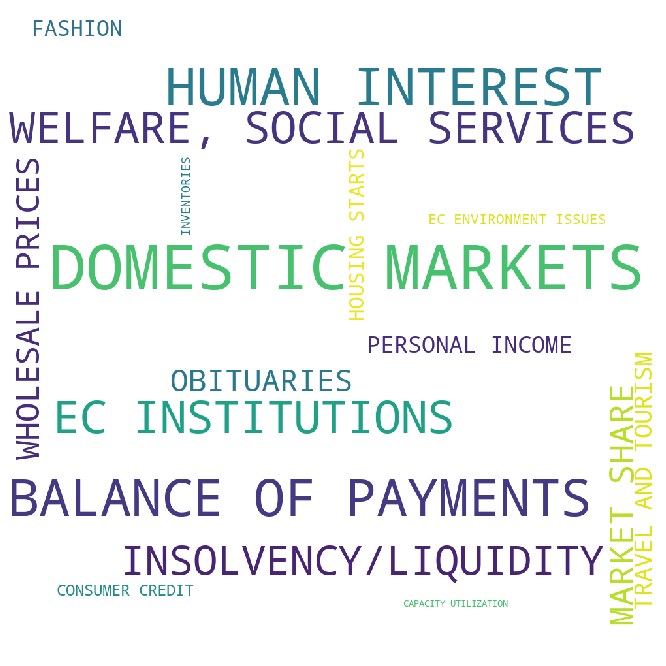

In [214]:
# make word cloud of the example amounts of the unlearned 256

unlearned_examples_dict = pd.Series(tot_256_not_learned.AMOUNT.values,index=tot_256_not_learned.DESCRIPTION).to_dict()

unlearned_examples_cloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(unlearned_examples_dict)
plt.figure(figsize=(12,12))
plt.imshow(unlearned_examples_cloud)
plt.axis("off")
plt.show()

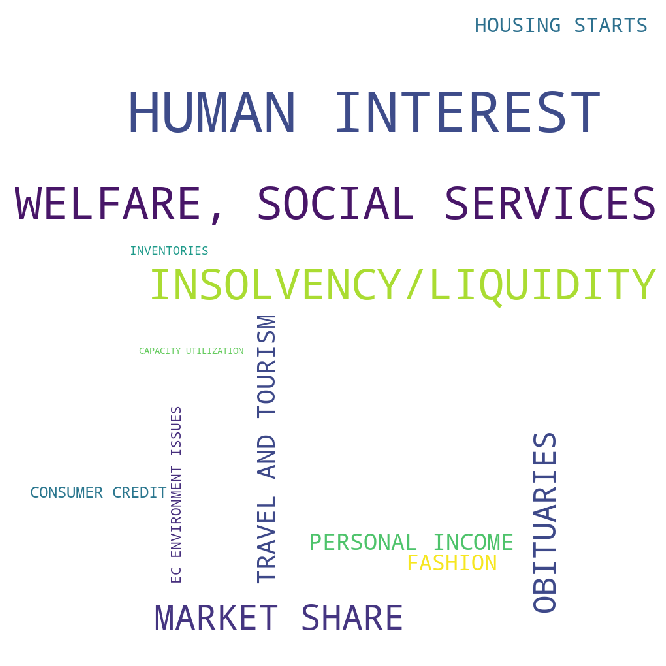

In [216]:
# make word cloud of the example amounts of the unlearned 512

unlearned_examples_dict_512 = pd.Series(tot_512_not_learned.AMOUNT.values,index=tot_512_not_learned.DESCRIPTION).to_dict()

unlearned_examples_cloud_512 = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(unlearned_examples_dict_512)
plt.figure(figsize=(12,12))
plt.imshow(unlearned_examples_cloud_512)
plt.axis("off")
plt.show()

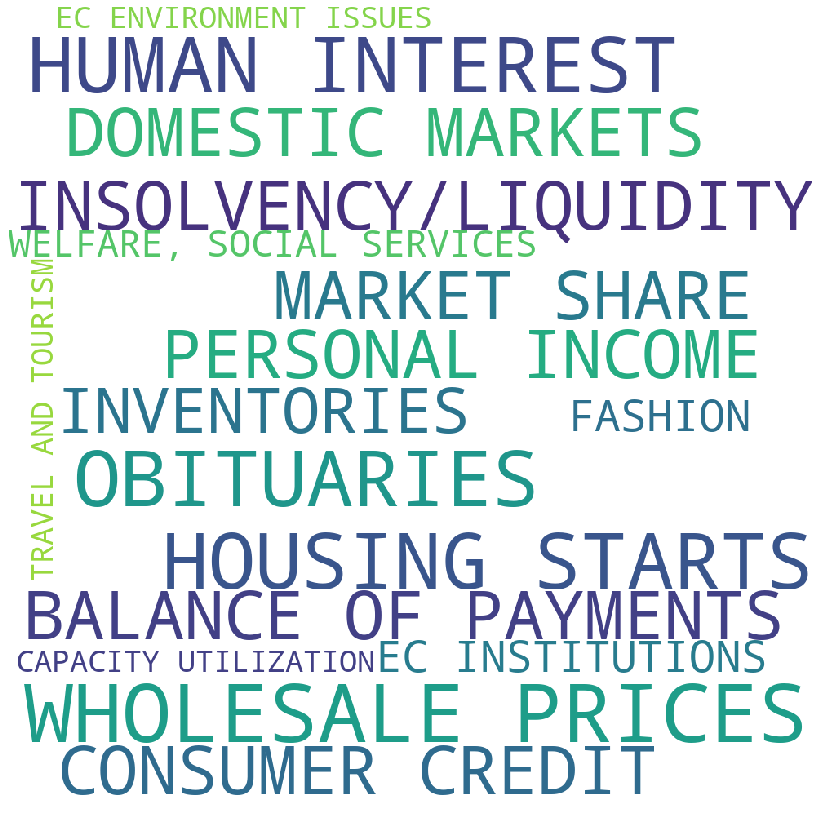

In [183]:
# 256 input length
# make word cloud of the false negative / exampla amount relation, the bigger the words, 
# the bigger the amount of false negatives regardless of exmples

unlearned_percent_dict = pd.Series(tot_256_not_learned.FALSESPERAMOUNT.values, index=tot_256_not_learned.DESCRIPTION).to_dict()
unlearned_percent_dict

unlearned_percent_cloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(unlearned_percent_dict)
plt.figure(figsize=(15,15))
plt.imshow(unlearned_percent_cloud)
plt.axis("off")
plt.show()


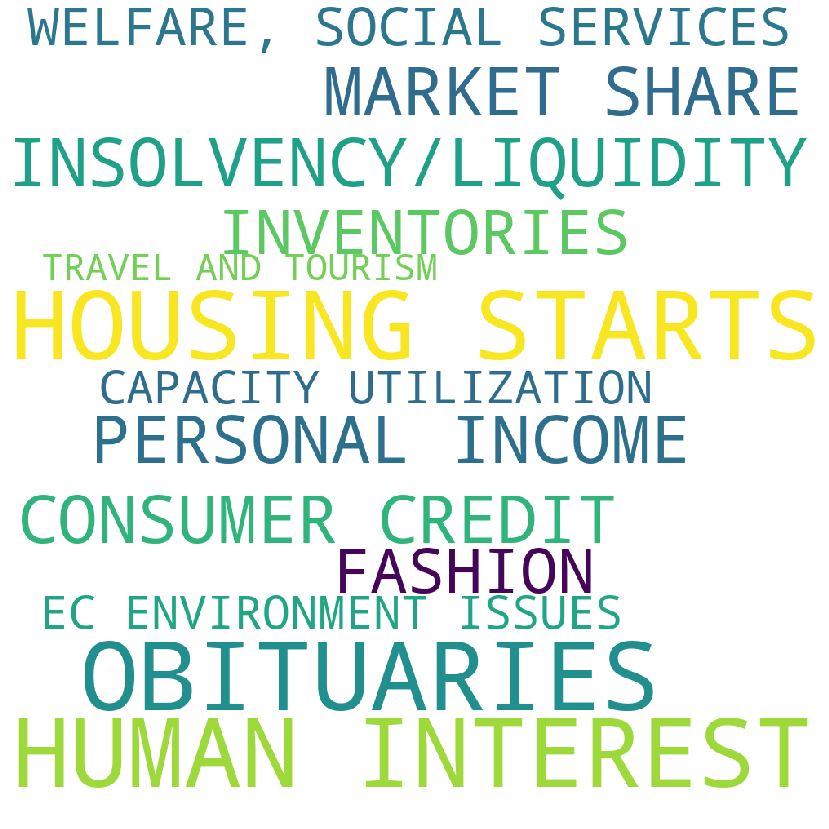

In [217]:
# 512 input length
# make word cloud of the false negative / exampla amount relation, the bigger the words, 
# the bigger the amount of false negatives regardless of exmples

unlearned_percent_dict_512 = pd.Series(tot_512_not_learned.FALSESPERAMOUNT.values, index=tot_512_not_learned.DESCRIPTION).to_dict()
unlearned_percent_dict_512

unlearned_percent_cloud_512 = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(unlearned_percent_dict_512)
plt.figure(figsize=(15,15))
plt.imshow(unlearned_percent_cloud_512)
plt.axis("off")
plt.show()

In [219]:
import plotly.express as px

In [153]:
tot_256_not_learned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 19 to 113
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CODE         17 non-null     object
 1   DESCRIPTION  17 non-null     object
 2   TP           17 non-null     int64 
 3   TN           17 non-null     int64 
 4   FP           17 non-null     int64 
 5   FN           17 non-null     int64 
 6   AMOUNT       17 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.1+ KB


In [220]:
paral_not_learned = px.parallel_categories(tot_256_not_learned, dimensions=['DESCRIPTION','TP','TN','FP','FN', 'AMOUNT'], color='FN', color_continuous_scale=px.colors.sequential.Inferno)

paral_not_learned.show()

In [162]:
paral_not_learned_fn = px.parallel_categories(tot_256_not_learned, dimensions=['DESCRIPTION','FN', 'AMOUNT'], color='FN', color_continuous_scale=px.colors.sequential.Inferno)

paral_not_learned_fn.show()

In [218]:
paral_not_learned_fn_512 = px.parallel_categories(tot_512_not_learned, dimensions=['DESCRIPTION','FN', 'AMOUNT'], color='FN', color_continuous_scale=px.colors.sequential.Inferno)

paral_not_learned_fn_512.show()